# Understanding Time Series 

Best Resource:

https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4.htm [1]

Nice Video for pre-processing:
https://www.youtube.com/watch?v=Prpu_U5tKkE [2]

TS Ana using Pandas: https://www.youtube.com/watch?v=zmfe2RaX-14 [3]  **Best video with the practical experience.**

For Noteboks in video: https://github.com/ikding/pycon_time_series

Another one:
https://onlinecourses.science.psu.edu/stat510/node/47/ [4]

**Time series analysis accounts for the fact that data points taken over time may have an internal structure (such as autocorrelation, trend or seasonal variation) that should be accounted for.** (From Above link)

**A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time** From: [Wikipedia](https://en.wikipedia.org/wiki/Time_series)

Examples of time series are heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average.

## Univariate Time Series

The term "univariate time series" refers to a time series that consists of single (scalar) observations recorded sequentially over equal time increments. Some examples are monthly CO2 concentrations and southern oscillations to predict el nino effects.

### Stationarity

A common assumption in many time series techniques is that the data are stationary.
A stationary process has the property that the mean, variance and autocorrelation structure do not change over time. They stays constant. Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations.

This means the values aren't drifting over time like up/down(const mean), unpredictable events is not happening over time(const variance), the structure isn't changing over time(const autocorrelation). Means time series behaves certain way it will be always like that. It can't be possible in real workld bu locally it is true.

Below is from [Wikipedia](https://en.wikipedia.org/wiki/Stationary_process)

![Stationary vs Non-Stationary](img\stationary_series.PNG)

**If the time series is not stationary, we can often transform it to stationarity.**

For more details for technique, see https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc442.htm or do google.

### Seasonality

Many time series display seasonality. By seasonality, we mean periodic fluctuations. For example, retail sales tend to peak for the Christmas season and then decline after the holidays. So time series of retail sales will typically show increasing sales from September through December and declining sales in January and February.

Seasonality is quite common in economic time series. It is less common in engineering and scientific data.

If seasonality is present, it must be incorporated into the time series model.

Usually 2 types:
1. Additive Seasonality
2. Muliplicative Seasonality

In the diagram below first one is the additive and the 2nd diagram is multiplicative seasonality.

In first, variance is about the same. It looks like the data is up-shifting and down shifting.

In second, as the values are chaging the variance is increasing. i.e. when the values are increasing there's more disruption in the waveform.

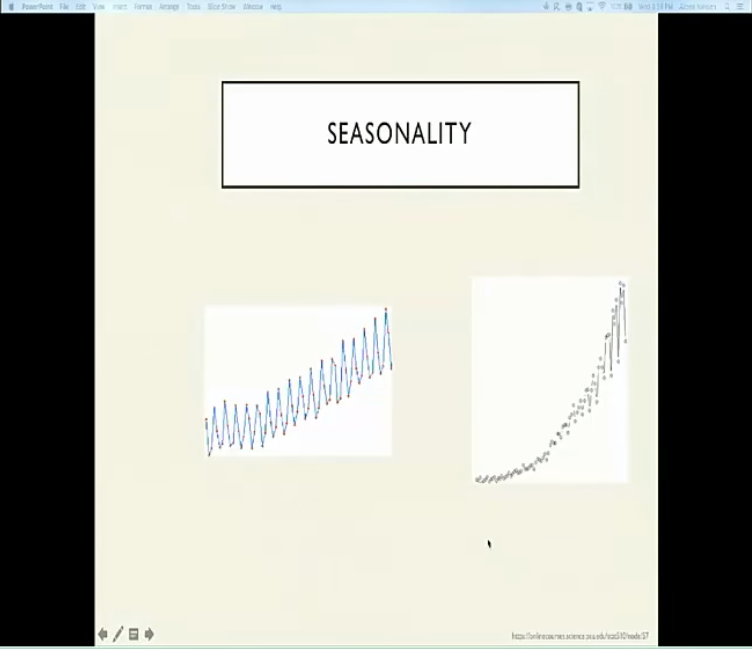

#### Determine Seasonality

Following graphical techniques can be used to detect seasonality.
1. A run sequence plot will often show seasonality. https://www.itl.nist.gov/div898/handbook/eda/section3/runseqpl.htm 
2. A seasonal subseries plot is a specialized technique for showing seasonality. https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4431.htm
3. Multiple box plots can be used as an alternative to the seasonal subseries plot to detect seasonality. https://www.itl.nist.gov/div898/handbook/eda/section3/boxplot.htm
4. The autocorrelation plot can help identify seasonality. https://www.itl.nist.gov/div898/handbook/eda/section3/autocopl.htm 


* The run sequence plot is a recommended **first step for analyzing any time series.**
* Although seasonality can sometimes be indicated with this plot, seasonality is **shown more clearly by the seasonal subseries plot or the box plot.**
* In most cases, the analyst will in fact know this. For example, for monthly data, the period is 12 since there are 12 months in a year. However, **if the period is not known, the autocorrelation plot can help.** If there is significant seasonality, the autocorrelation plot should show spikes at lags equal to the period.

### Understand Time series data

1. Create Run Sequance Plot. e.g. scatter plot with time column and the data. It will give following info.
    * Are there any shifts in location?
    * Are there any shifts in variation?
    * Are there any outliers?
2. Create autocorrelation plot.
   * Are the data random?
   * Is an observation related to an adjacent observation?
   * Is an observation related to an observation twice-removed? (etc.)
   * Is the observed time series white noise?
   * Is the observed time series sinusoidal?
   * Is the observed time series autoregressive?
   * What is an appropriate model for the observed time series?
   
Check [Interpreting Auto Correlations](https://www.dummies.com/programming/big-data/data-science/autocorrelation-plots-graphical-technique-for-statistical-data/)

In [13]:
# Run Sequance Plot

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np


data = pd.read_csv(r"data_ts.csv")
print("Num observations:%d"%(data.shape[0]))

Num observations:117


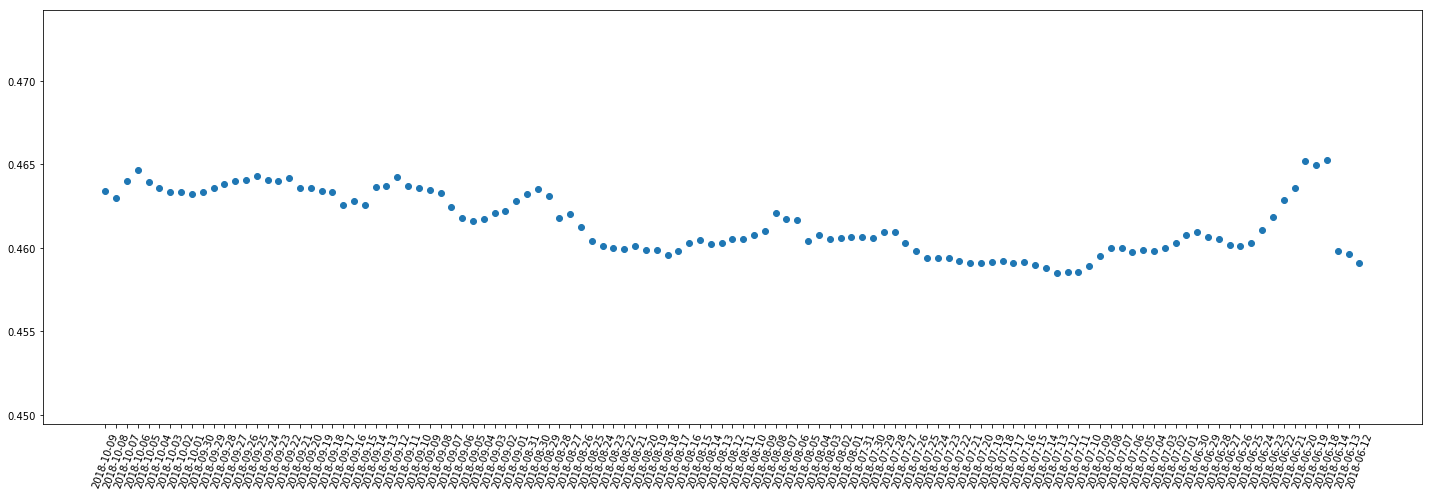

In [8]:
plt.figure(figsize=(20,7))
plt.scatter(data.DateAnalyzed, data.Mean)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

### Time series pre-process
Pre-Processing & Filtering [2]

![Pre processing and Filtering](img\time_series_pre_proc.png)


Preprocessing: Remove the changin mean in between one year to another by fitting linear model [2]

![Remove Changing Mean](img\time_series_pre_proc1.png)

## Smoothing

All from [3]

Used to get rid of noise.

Use rolling window and expanding window functionality. 

Use xpanding window when there's some static useful window in very past and want to use it in the analysis else **always use rolling window**

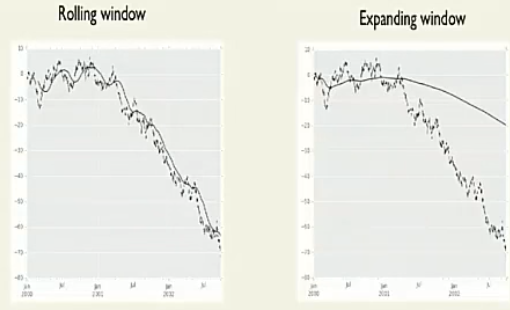


### Exponentially moving avg 
**weights more recent observations.** An exponential moving average (EMA), also known as an exponentially weighted moving average (EWMA),[5] is a first-order infinite impulse response filter that applies weighting factors which decrease exponentially. The weighting for each older datum decreases exponentially, never reaching zero. 

See "Experiments with Time series notebook" for code for all 3 functionality

<Figure size 1440x504 with 0 Axes>

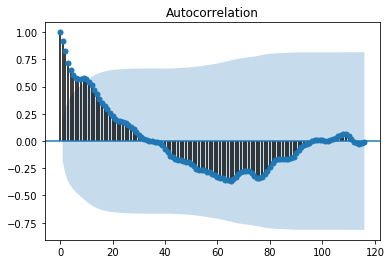

In [10]:
# autocorrelation plot
plt.figure(figsize=(20,7))
plot_acf(data.Mean)
plt.show()

# Here the plot doesn't give any good info. Use it after cleaning/de-trending of the data

## AutoCorrelation, Self-Correlation

An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other. (The prefix auto means “self”— autocorrelation specifically refers to correlation among the elements of a time series.) Used to identify the possible structure of ts data. **Gives sense that how the different points in time relate to each other** in a way explained by temporal distance. [1][3]

An autocorrelation plot shows the value of the autocorrelation function (acf) on the vertical axis. It can range from –1 to 1.

The horizontal axis of an autocorrelation plot **shows the size of the lag between the elements of the time series**. For example, the autocorrelation with lag 2 is the correlation between the time series elements and the corresponding elements that were observed two time periods earlier. **By default the lags are 1. i.e. correlation between current value and the previous val**. If lag==2, then it will auto correlate day1 to day3, day2 to day4, day3 to day5 etc.... [1,3]

On the graph, there is a vertical line (a “spike”) corresponding to each lag. The height of each spike shows the value of the autocorrelation function for the lag.

The autocorrelation with lag zero always equals 1, because this represents the autocorrelation between each term and itself. Price and price with lag zero are the same variable.

Each spike that rises above or falls below the dashed lines is considered to be statistically significant. This means the spike has a value that is significantly different from zero. **If a spike is significantly different from zero, that is evidence of autocorrelation. A spike that’s close to zero is evidence against autocorrelation.**

NOTE: **USE IT AFTER PRE-PROCESSING LIKE DE-TREND OF DATA, Smoothing etc.**

--> See "Experiments with Time series" for pandas based Corr plots

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


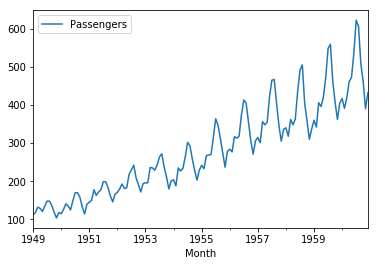

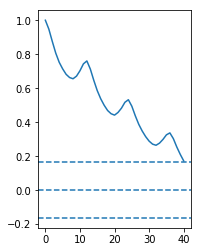

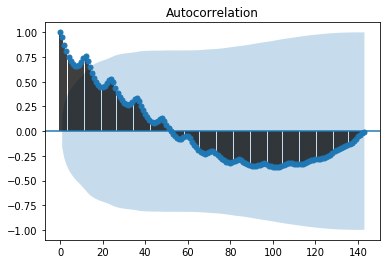

In [17]:
#ACR on more relevant data

# In this data, there's some internal structure as it shows some periodicity for every year.
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

air_passengers = pd.read_csv("air_passanger.csv", header=0, parse_dates=[0], names = ['Month', 'Passengers'], index_col = 0)
print(air_passengers.head())
air_passengers.plot()
plt.show()

plt.clf()
acf_result = stattools.acf(air_passengers)
plt.subplot(121) 
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(air_passengers)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(air_passengers)),linestyle='--')

plot_acf(air_passengers)
plt.show()

In the fig#2 it shows some trends. Like it has recurent humps, a downward line fitting. It is good that structure can be seen but it is worriying.

So the data should be de-trend by taking log and the difference. The log can take us to stationarity. The idea is, the time series should look relativly constant in the time, the variance/mean is const. in the time. It can help to see that why sometimes it is above the mean and why it is sometimes below the mean w/o having distraction of overall drift. 

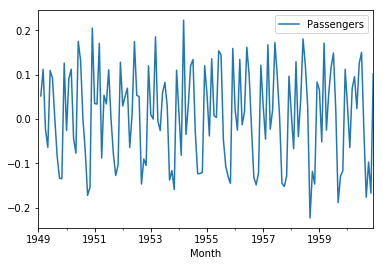

In [18]:
log_air_passengers = np.log(air_passengers)
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()
log_air_passengers_diff.plot()

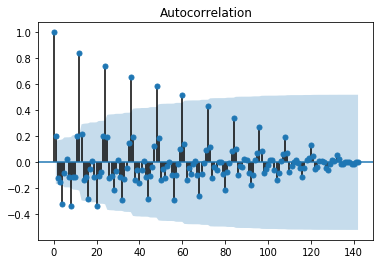

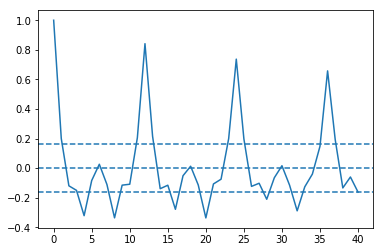

In [19]:
log_air_passengers_diff = log_air_passengers_diff
log_air_passengers_diff.dropna(inplace = True)

plot_acf(log_air_passengers_diff)
plt.show()

plt.clf()
acf_result = stattools.acf(log_air_passengers_diff)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')
plt.show()

The above structure provides const. structure rather then the massive spike. Also, it shows periods. The X-axis is the lag. 1 shows the number. At number 12 on X-Axis shows high correlation. So there must be something going on.

## Partial Autocorrelation


Gives the partial correlation of a time series with its own lagged values, controlling for the values of time-series at all shorter lags.[3] 

For example, if there's weekly data for working human stress levels and assume that ppl have high stress level on every monday, then for every monday, it will show high autocorelation for every 7 days. When we want to see that is there really any co-relaton for those every monday then it partial correlation will remove the data for tue-sun and gives corr for mon to mon. 

## Pre-Prediction munging and Convert in Stationary

A stationary process has the property that the mean, variance and autocorrelation structure do not change over time. But it is not possible that every time-series is stationary. [3]

* Possible steps to make series stationary [3]
    1. Differencing to create stationary series
    2. Apply local smoothing(logs) or linear regression(fit the line) by taking some kind of moving avg. Linear reg. is good but it may not remove trend all the way.

* Removing seasonality
    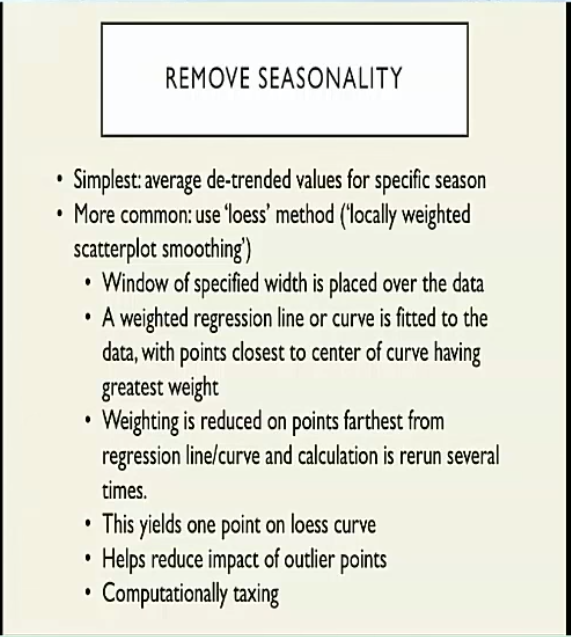

* Remove variance Trend

    < Need to search how >

* Test Stationarity
    > Use dickey-fuller test. Print the p-value. If it very low then it is not a good way to move ahead. 

## Forecasting ARIMA [3]

2 Processes:
1. Moving average
2. Auto-regressive

### Moving Average(MA)

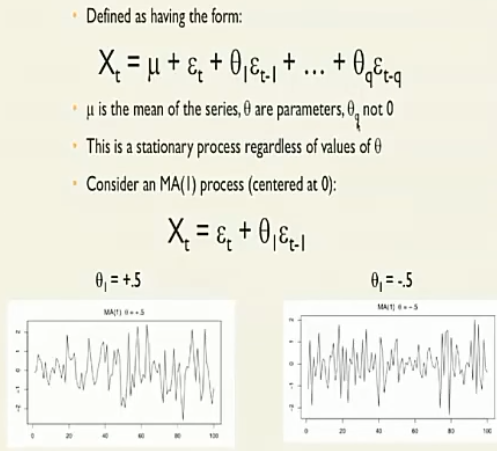

>Xt in formula is current value in time. u is current mean + error terms going back in the time. Thetas are the parameters. THis stationary process regardless of theta. The errors can be iid[(iid)](https://math.stackexchange.com/questions/787197/what-does-a-probability-being-i-i-d-means), gaussian, mean0 etc. This is gueranteed to be a stationary moving avg. because it is being applied to stationary series and vice versa. Like if you're applying MA then it should be a stationary. 

* MA(1) means only 1 prior term i.e. only the observation before the current Xt. Xt= Error at that time Et and the error at previous time Et-1 with the theta param.

* In Diagram it shows the impact of the theta on the series for MA(1) process.

### Autoregressive (AR)

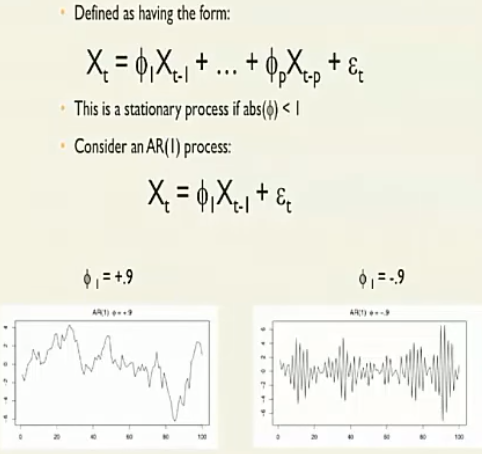


> In formula, Xt is dependent on the value of previous times Xt-1. In MA, you oscilate around mean and error term each time the error term carris forward. In AR, it syas that current value has something to do with the past value. It is like the current value Xt is a fitted value to the prior value + an error term.

* AR(1) is based on only 1 value prior to current term. Like it is y=mx+b where y=Xt, x=Xt-1, m=phi, b=error term
* Positive and -ve phi can have goo impact. +ve tends to smoother and -ve tends to be somewht noisy

### ARIMA(aka Box and Jenkins)

I in ARIMA is differencing. It is same as it is done in detrend the data. The developer will need to tell algo that how many times the differencing should be done.

* ARIMA Preconditions

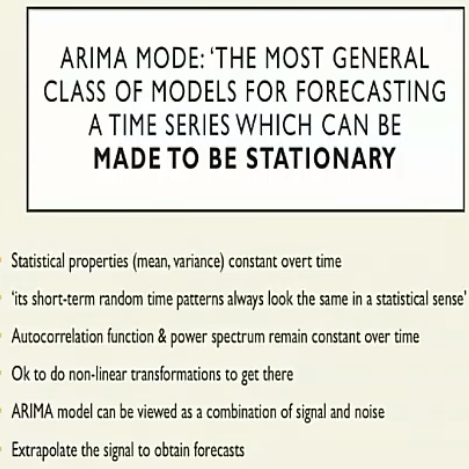

* Applying ARIMA

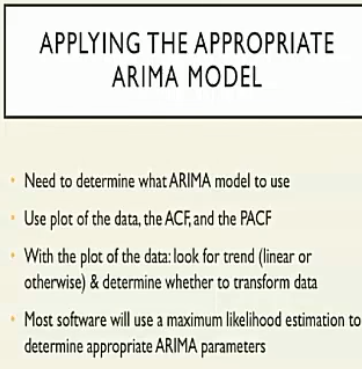

* Autocorr for ARIMA model for the model diagnostics

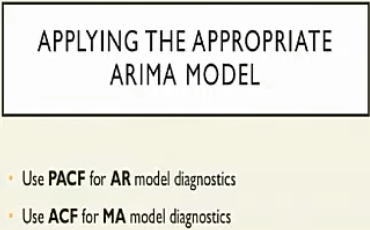

> Each of this plots give different info that what we want to use for ARIMA model.

> ARIMA model limitations: As more predictions expected in future, it will increase the errors.

> See "Experiments with time series" for code and model daignostics